In [2]:
#%run get_data.ipynb
#!pip3 install import_ipynb
#!pip3 install mpl_finance

import import_ipynb
import get_data as get

importing Jupyter notebook from get_data.ipynb


In [5]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import os 
import matplotlib as mpl
from timeit import default_timer as timer

In [9]:
start = timer()

def money_volume_flow(ticker):
    
    '''Calculates the money_volume_flow and creates 
    a column on existing csv file and adds to it using the 
    inbult get.add_col function'''
    
    df = pd.DataFrame()
    data = get.get_data(ticker)
    
    money_flow_volume_list = np.zeros(len(data))
    
    for i in range(len(data)):
    
        high = data.iloc[i]['High']
        low = data.iloc[i]['Low']
        close = data.iloc[i]['Close']
        volume = data.iloc[i]['Volume']

        money_multiplier = ((close  -  low) - (high - close))/(high - low)
        money_flow_volume = money_multiplier*volume
        money_flow_volume_list[i] = money_flow_volume
    
    #data['Money Flow Volume'] = money_flow_volume_list
    df['Money Flow Volume'] = money_flow_volume_list 
    
    return df


    
if __name__=='__main__':
    print(money_volume_flow('JNJ').head())
    end = timer()
    time_elapsed = end - start

    print('\nTime taken to run the code: {}\n'.format(round(time_elapsed,3)))
    

   Money Flow Volume
0       4.299154e+06
1      -1.433876e+07
2       1.329341e+07
3       1.328367e+07
4      -5.203289e+06

Time taken to run the code: 2.901



In [7]:
def ADL(ticker):
    '''Calculates the Accumulation Distribution Line
       It also add rows of Money Flow Volume and ADL to csv file
       by using the get.add_col function''' 
    
    df = money_volume_flow(ticker)
    get.add_col(df,ticker,heading = 'Money Flow Volume')
        
    ADL_list = []      #np.zeros(len(df),dtype = 'float64')
    ADL_df = pd.DataFrame()    
    
    sum = 0
    for value in df.values.flatten():
        sum += value
        ADL_list.append(sum)
    
    ADL_df['ADL'] = ADL_list
    get.add_col(ADL_df,ticker,heading = 'ADL')
    
    return ADL_df

if __name__=="__main__":
    print(ADL('AAPL').tail(5))



AAPL data already saved in stock_dfs. Building graph....


               ADL
2512  6.703838e+09
2513  6.716136e+09
2514  6.716759e+09
2515  6.695598e+09
2516  6.714087e+09


In [9]:
def chaikin_oscillator(ticker,time_frame = (3,10)):
    
    if os.path.exists('stock_dfs/{}.csv'.format(ticker)):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                     parse_dates=True,index_col=0)
        
        if not 'ADL' in df.columns: 
            ADL(ticker);
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                 parse_dates=True,index_col=0)
    else: 
        ADL(ticker);
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                 parse_dates=True,index_col=0)
    
    data = df['ADL']

    low = min(time_frame)
    high = max(time_frame)
    
    ema_low = get.exponential_moving_average(data,window = low)
    ema_high = get.exponential_moving_average(data,window = high)
    
    chi_osc = ema_low - ema_high
    get.add_col(chi_osc,ticker,heading = 'Chaikin Oscillator')
    
    return chi_osc

if __name__=="__main__":
    print(chaikin_oscillator('MSFT').tail(10))

Date
2019-01-28    8.886106e+07
2019-01-29    8.432104e+07
2019-01-30    7.291472e+07
2019-01-31    5.583732e+07
2019-02-01    6.419317e+07
2019-02-04    7.255743e+07
2019-02-05    6.233005e+07
2019-02-06    6.914419e+07
2019-02-07    8.182437e+07
2019-02-08    8.545663e+07
Name: ADL, dtype: float64


In [11]:
def count(ticker):
    '''Counts the number of positive and negative money flow volume'''
    
    if os.path.exists('stock_dfs/{}.csv'.format(ticker)):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker),parse_dates=True,index_col=0)
        if not 'Money Flow Volume' in df.columns:
            data = money_volume_flow(ticker)
        
        else:
            data = df['Money Flow Volume']
    
    else:
        data = money_volume_flow(ticker)
    
    #df = pd.read_csv('stock_dfs/{}.csv'.format(ticker),parse_dates=True,index_col=0)
    
    count = {'Up':0 , 'Down' : 0} 
    #print(data)
    count['Up'] = len(data[data>=0])
    count['Down'] = len(data) - count['Up'] 

    return count

if __name__=='__main__':
    print(count('FB'))

{'Up': 1692, 'Down': 0}


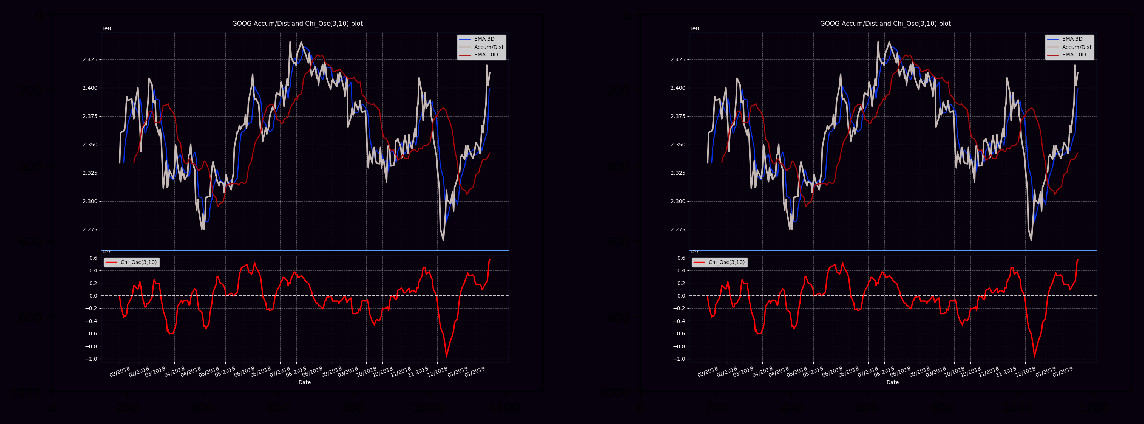

In [19]:
'''img_source1 = mpl.image.imread('chiOsc_plots/GOOG_chiOsc_plot.png')
fig = plt.figure(figsize=(13,10),facecolor= '#07000d')
ax1 = plt.subplot2grid((6,2),(0,0),rowspan = 3, colspan = 1,facecolor='#07000d')
ax2 = plt.subplot2grid((6,2),(0,1),rowspan = 3, colspan = 1, sharex = ax1,facecolor='#07000d')
#ax1 = plt.subplot(121)
#ax2 = plt.subplot(122)

ax1.imshow(img_source1)
ax2.imshow(img_source1)
fig.subplots_adjust(left = 0.1,right = 0.93,top = 0.95,wspace = 0.2,hspace=0.09) 


if __name__=='__main__':
    plt.show()
    fig.savefig('GOOG_plot.png',facecolor = fig.get_facecolor(),format='png')  #, dpi=500 '''